In [2]:
%pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import cufflinks as cf; cf.go_offline()
import plotly_express as px
from sklearn.datasets._samples_generator import make_moons
from sklearn.datasets._samples_generator import make_circles
from sklearn.model_selection import train_test_split
import sys; sys.path.append('../src')
import ipywidgets as widgets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
#from datasets import make_circles_dataframe, make_moons_dataframe
#import datasets as ds

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# 1.Create Data Sets

In [ ]:

def make_circles_dataframe(len, noise):
    X,y = make_circles(len, factor=0.5, noise=noise)
    df_circles = pd.DataFrame(X, columns=['x','y'])
    df_circles['label'] = y
    df_circles['noise'] = noise
    df_circles['type'] = 'circles'
    df_circles['samples'] = len
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')
    return df_circles

In [ ]:
def make_moons_dataframe(len, noise):
    X,y = make_moons(len, noise=noise)
    df_moons = pd.DataFrame(X, columns=['x','y'])
    df_moons['label'] = y
    df_moons['noise'] = noise
    df_moons['type'] = 'moons'
    df_moons['samples'] = len
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')
    return df_moons

In [ ]:
def make_data(len_range, noise_range):
    df = pd.DataFrame()
    for len in len_range:
        for noise in noise_range:
            df = pd.concat([df, make_circles_dataframe(len, noise)])
            df = pd.concat([df, make_moons_dataframe(len, noise)])
    return df

In [ ]:
datasets = make_data()
datasets.sample(10)

# 2. Calculate the prediction accuracy

In [205]:
#example:
df = make_circles_dataframe(10000,0.2)
df.iloc[:,[0,1]]
df.loc[:,'label']
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,[0,1]], df.loc[:,'label'], test_size=0.2, random_state=42)
X_train.sample(5)
X_test.sample(5)

,x,y
1210,-0.136468,-0.732431
9485,0.471639,-0.198738
710,-0.829208,0.386268
1544,-0.440744,0.355296
7323,0.707267,-0.522384


## 2.1 SVM

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



None


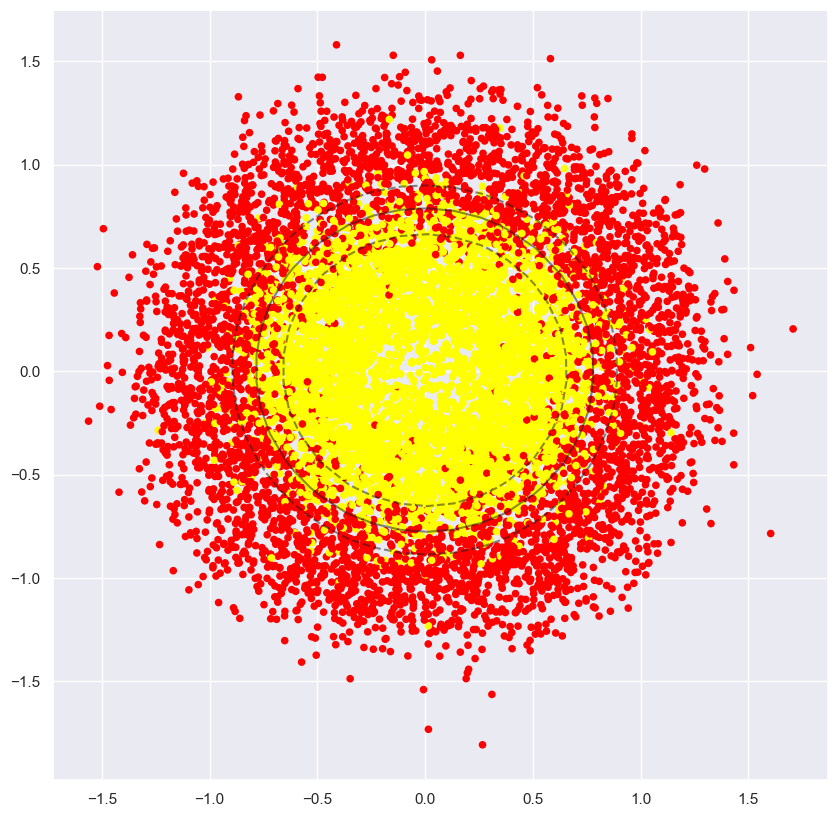

In [210]:
clf = SVC(kernel='rbf', C=100, gamma=0.1)
clf.fit(df.iloc[:,[0,1]], df.loc[:,'label'])
predict = clf.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df.loc[:,'label'], s=20, cmap='autumn')
print(plot_svc_decision_function(clf, plot_support=False))

In [ ]:
def calc_confusion_metrix(data, true_col, pred_col):
    confusion_counts = data.groupby([true_col,pred_col]).size().to_frame('counts')
    class_counts = data.groupby([true_col]).size().to_frame('counts')
    confusion_counts['proportion'] = confusion_counts.div(class_counts)
    confusion_counts.index.names = ['True class', 'Predicted class']
    return confusion_counts  

In [ ]:
def calc_accuracy(data, true_result, model):
    temp_result = data
    temp_result["label"] = true_result 
    temp_result["predict"] = model.predict(data[['x','y']])
    accuracy = temp_result[temp_result.label == temp_result.predict].count()[0]/temp_result.count()[0]
    return accuracy

In [216]:
def analize_SVM(df, C, gamma_value):
    x = df.iloc[:,[0,1]]
    y = df.loc[:,'label']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    clf = SVC(kernel='rbf', C=C, gamma=gamma_value)
    clf.fit(X_train, y_train)
    accuracy_train = calc_accuracy(X_train, y_train, clf)
    accuracy_test = calc_accuracy(X_test, y_test, clf)
    return accuracy_train, accuracy_test

In [212]:
result = analize_SVM(df, 10, 0.5)
result

(0.8905, 0.897)

## 2.2 Logistic regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



                            counts  proportion
True class Predicted class                    
0          0                   523    0.648883
           1                   283    0.351117
1          0                   663    0.835013
           1                   131    0.164987
                            counts  proportion
True class Predicted class                    
0          0                   121    0.623711
           1                    73    0.376289
1          0                   179    0.868932
           1                    27    0.131068


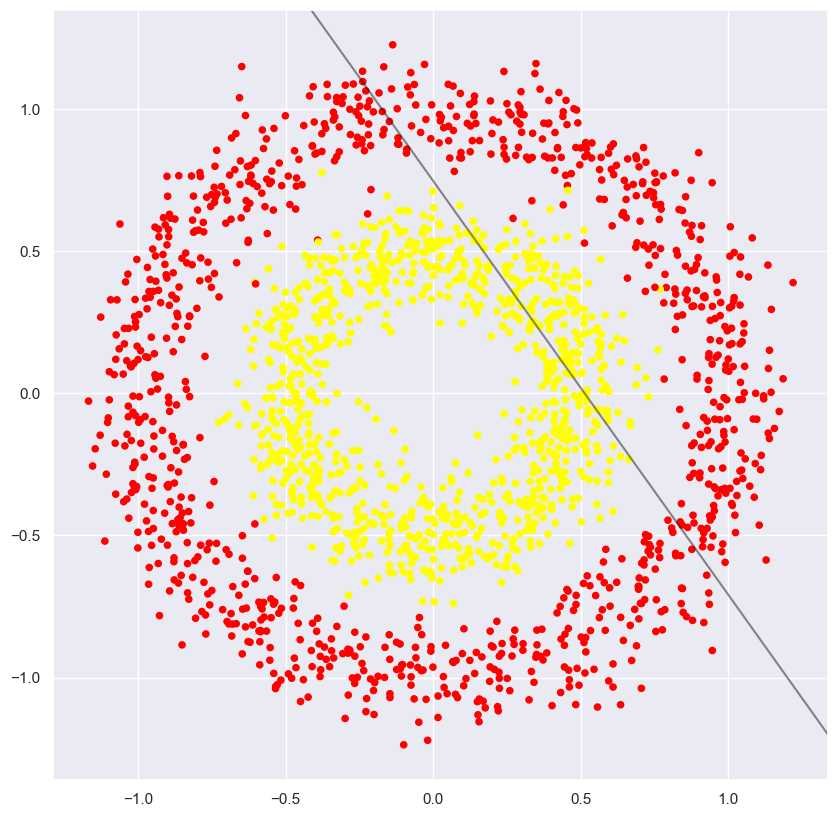

In [59]:
   #Sample - playground
    
    df = make_circles_dataframe(2000, 0.1)
    
    x = df.iloc[:,[0,1]]
    y = df.loc[:,'label']
    log_reg = LogisticRegression(fit_intercept=True, penalty='l2', C=0.1, solver="saga")
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    log_reg.fit(X_train, y_train.squeeze())
    predict_test = log_reg.predict(X_test)
    predict_train = log_reg.predict(X_train)
    plt.figure(figsize=(10,10))
    plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df.loc[:,'label'], s=20, cmap='autumn')
    plot_svc_decision_function(log_reg, plot_support=False);
    train_result = X_train
    train_result["true"] = y_train
    train_result["predict"] = predict_train
    print(calc_confusion_metrix(train_result, "true", "predict"))
    
    test_result = X_test
    test_result["true"] = y_test
    test_result["predict"] = predict_test
    print(calc_confusion_metrix(test_result, "true", "predict"))

In [129]:
def analize_logistic_regression(df, penalty, C, solver):
    x = df.iloc[:,[0,1]]
    y = df.loc[:,'label']
    if penalty == "none":
        log_reg = LogisticRegression(fit_intercept=True)
    else: 
        log_reg = LogisticRegression(fit_intercept=True, penalty=penalty, C=C, solver=solver)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    log_reg.fit(X_train, y_train.squeeze())
    accuracy_train = calc_accuracy(X_train, y_train, log_reg)
    accuracy_test = calc_accuracy(X_test, y_test, log_reg)
    return accuracy_train, accuracy_test

def analize_logistic_regression_saga(df,penalty, C):
    return analize_logistic_regression(df, penalty, C, "saga")


In [130]:
#try out logistic regression
df = make_circles_dataframe(2000, 0.1)

result = analize_logistic_regression_saga(df, "none", 0)
print(result)
result[1]/result[0]


(0.53, 0.515)


0.9716981132075472

# 3. Run over all data

In [ ]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [5, 10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
gamma_range = [0.1, 0.5, 1, 2, 5, 7, 10, 20, 50, 100]
penalty_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = [] 
datasets = make_data(n_samples, noise_levels)

for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets[(datasets.type == 'circles') & (datasets.noise == nl) & (datasets.samples == n)].head(n)
            print(f'{pd.Timestamp.now()} Starting {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for clf_type in clf_types:
                print(f'{pd.Timestamp.now()} Going to train {clf_type} classifier.')
                
                if clf_type == 'log_reg':
                    for penalty in penalty_range:
                        train_acc, test_acc = analize_logistic_regression_saga(ds, "l2", penalty)
                        results.append((ds_type, nl, n, clf_type, penalty, train_acc, test_acc, test_acc/train_acc))
                            
                if clf_type == 'svm':
                    for gamma in gamma_range:
                        train_acc, test_acc = analize_SVM(ds, 100, gamma)
                        results.append((ds_type, nl, n, clf_type, gamma, train_acc, test_acc, test_acc/train_acc))
            print(f'{pd.Timestamp.now()} Train {n} samples done.')
                        

Working on circles
2023-05-13 22:22:33.714376 Starting circles datasets with 5 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:33.714376 Going to train log_reg classifier.
2023-05-13 22:22:33.767881 Going to train svm classifier.
2023-05-13 22:22:33.835728 Train 5 samples done.
2023-05-13 22:22:33.835728 Starting circles datasets with 10 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:33.835728 Going to train log_reg classifier.
2023-05-13 22:22:33.886904 Going to train svm classifier.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:22:33.943705 Train 10 samples done.
2023-05-13 22:22:33.950702 Starting circles datasets with 50 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:33.950702 Going to train log_reg classifier.
2023-05-13 22:22:34.004483 Going to train svm classifier.
2023-05-13 22:22:34.052257 Train 50 samples done.
2023-05-13 22:22:34.067911 Starting circles datasets with 100 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:34.067911 Going to train log_reg classifier.
2023-05-13 22:22:34.099715 Going to train svm classifier.
2023-05-13 22:22:34.193822 Train 100 samples done.
2023-05-13 22:22:34.200836 Starting circles datasets with 1000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:34.200836 Going to train log_reg classifier.
2023-05-13 22:22:34.250352 Going to train svm classifier.
2023-05-13 22:22:34.569978 Train 1000 samples done.
2023-05-13 22:22:34.576129 St

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:22:40.479328 Starting circles datasets with 50 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:40.479328 Going to train log_reg classifier.
2023-05-13 22:22:40.526119 Going to train svm classifier.
2023-05-13 22:22:40.597622 Train 50 samples done.
2023-05-13 22:22:40.603617 Starting circles datasets with 100 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:40.603617 Going to train log_reg classifier.
2023-05-13 22:22:40.637361 Going to train svm classifier.
2023-05-13 22:22:40.708725 Train 100 samples done.
2023-05-13 22:22:40.714725 Starting circles datasets with 1000 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:40.714725 Going to train log_reg classifier.
2023-05-13 22:22:40.775267 Going to train svm classifier.
2023-05-13 22:22:40.936190 Train 1000 samples done.
2023-05-13 22:22:40.943190 Starting circles datasets with 10000 samples a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:22:43.811612 Train 10 samples done.
2023-05-13 22:22:43.818610 Starting circles datasets with 50 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:43.818610 Going to train log_reg classifier.
2023-05-13 22:22:43.884694 Going to train svm classifier.
2023-05-13 22:22:43.946574 Train 50 samples done.
2023-05-13 22:22:43.962249 Starting circles datasets with 100 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:43.962249 Going to train log_reg classifier.
2023-05-13 22:22:44.009680 Going to train svm classifier.
2023-05-13 22:22:44.096392 Train 100 samples done.
2023-05-13 22:22:44.099555 Starting circles datasets with 1000 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:22:44.099555 Going to train log_reg classifier.
2023-05-13 22:22:44.161458 Going to train svm classifier.
2023-05-13 22:22:44.559138 Train 1000 samples done.
2023-05-13 22:22:44.559

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:23:13.781206 Starting circles datasets with 50 samples and noise level 0.3. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:23:13.781206 Going to train log_reg classifier.
2023-05-13 22:23:13.842763 Going to train svm classifier.
2023-05-13 22:23:13.911266 Train 50 samples done.
2023-05-13 22:23:13.917255 Starting circles datasets with 100 samples and noise level 0.3. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:23:13.917255 Going to train log_reg classifier.
2023-05-13 22:23:13.960302 Going to train svm classifier.
2023-05-13 22:23:14.025635 Train 100 samples done.
2023-05-13 22:23:14.031659 Starting circles datasets with 1000 samples and noise level 0.3. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:23:14.031659 Going to train log_reg classifier.
2023-05-13 22:23:14.089134 Going to train svm classifier.
2023-05-13 22:23:14.577565 Train 1000 samples done.
2023-05-13 22:23:14.598253 Starting circles datasets with 10000 samples a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:24:18.791345 Starting circles datasets with 50 samples and noise level 0.4. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:24:18.791345 Going to train log_reg classifier.
2023-05-13 22:24:18.838147 Going to train svm classifier.
2023-05-13 22:24:18.885495 Train 50 samples done.
2023-05-13 22:24:18.901110 Starting circles datasets with 100 samples and noise level 0.4. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:24:18.901110 Going to train log_reg classifier.
2023-05-13 22:24:18.947995 Going to train svm classifier.
2023-05-13 22:24:19.011062 Train 100 samples done.
2023-05-13 22:24:19.011062 Starting circles datasets with 1000 samples and noise level 0.4. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:24:19.011062 Going to train log_reg classifier.
2023-05-13 22:24:19.074087 Going to train svm classifier.
2023-05-13 22:24:19.780875 Train 1000 samples done.
2023-05-13 22:24:19.780875 Starting circles datasets with 10000 samples a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:25:51.772264 Train 10 samples done.
2023-05-13 22:25:51.772264 Starting circles datasets with 50 samples and noise level 0.5. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:25:51.772264 Going to train log_reg classifier.
2023-05-13 22:25:51.821542 Going to train svm classifier.
2023-05-13 22:25:51.897701 Train 50 samples done.
2023-05-13 22:25:51.897701 Starting circles datasets with 100 samples and noise level 0.5. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:25:51.897701 Going to train log_reg classifier.
2023-05-13 22:25:51.951183 Going to train svm classifier.
2023-05-13 22:25:52.038911 Train 100 samples done.
2023-05-13 22:25:52.051418 Starting circles datasets with 1000 samples and noise level 0.5. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:25:52.051418 Going to train log_reg classifier.
2023-05-13 22:25:52.133803 Going to train svm classifier.
2023-05-13 22:25:52.983073 Train 1000 samples done.
2023-05-13 22:25:52.983

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:27:47.630809 Train 10 samples done.
2023-05-13 22:27:47.637803 Starting moons datasets with 50 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:47.637803 Going to train log_reg classifier.
2023-05-13 22:27:47.681478 Going to train svm classifier.
2023-05-13 22:27:47.741916 Train 50 samples done.
2023-05-13 22:27:47.757539 Starting moons datasets with 100 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:47.757539 Going to train log_reg classifier.
2023-05-13 22:27:47.820268 Going to train svm classifier.
2023-05-13 22:27:47.905528 Train 100 samples done.
2023-05-13 22:27:47.912526 Starting moons datasets with 1000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:47.912526 Going to train log_reg classifier.
2023-05-13 22:27:47.957901 Going to train svm classifier.
2023-05-13 22:27:48.331871 Train 1000 samples done.
2023-05-13 22:27:48.331871 Starting

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:27:55.665390 Train 10 samples done.
2023-05-13 22:27:55.672390 Starting moons datasets with 50 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:55.672390 Going to train log_reg classifier.
2023-05-13 22:27:55.721270 Going to train svm classifier.
2023-05-13 22:27:55.783571 Train 50 samples done.
2023-05-13 22:27:55.799205 Starting moons datasets with 100 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:55.799205 Going to train log_reg classifier.
2023-05-13 22:27:55.846476 Going to train svm classifier.
2023-05-13 22:27:55.930086 Train 100 samples done.
2023-05-13 22:27:55.937086 Starting moons datasets with 1000 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:55.937086 Going to train log_reg classifier.
2023-05-13 22:27:55.983347 Going to train svm classifier.
2023-05-13 22:27:56.174397 Train 1000 samples done.
2023-05-13 22:27:56.189281 St

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:27:59.439638 Train 10 samples done.
2023-05-13 22:27:59.446639 Starting moons datasets with 50 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:59.446639 Going to train log_reg classifier.
2023-05-13 22:27:59.503728 Going to train svm classifier.
2023-05-13 22:27:59.585049 Train 50 samples done.
2023-05-13 22:27:59.587657 Starting moons datasets with 100 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:59.587657 Going to train log_reg classifier.
2023-05-13 22:27:59.642203 Going to train svm classifier.
2023-05-13 22:27:59.724859 Train 100 samples done.
2023-05-13 22:27:59.728964 Starting moons datasets with 1000 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:27:59.728964 Going to train log_reg classifier.
2023-05-13 22:27:59.775835 Going to train svm classifier.
2023-05-13 22:28:00.154712 Train 1000 samples done.
2023-05-13 22:28:00.154712 St

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:28:31.893182 Train 10 samples done.
2023-05-13 22:28:31.901061 Starting moons datasets with 50 samples and noise level 0.3. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:28:31.901061 Going to train log_reg classifier.
2023-05-13 22:28:31.961023 Going to train svm classifier.
2023-05-13 22:28:32.024135 Train 50 samples done.
2023-05-13 22:28:32.039759 Starting moons datasets with 100 samples and noise level 0.3. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:28:32.039759 Going to train log_reg classifier.
2023-05-13 22:28:32.087030 Going to train svm classifier.
2023-05-13 22:28:32.243479 Train 100 samples done.
2023-05-13 22:28:32.259500 Starting moons datasets with 1000 samples and noise level 0.3. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:28:32.259500 Going to train log_reg classifier.
2023-05-13 22:28:32.322518 Going to train svm classifier.
2023-05-13 22:28:33.055544 Train 1000 samples done.
2023-05-13 22:28:33.056547 St

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:29:43.147283 Train 10 samples done.
2023-05-13 22:29:43.162906 Starting moons datasets with 50 samples and noise level 0.4. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:29:43.162906 Going to train log_reg classifier.
2023-05-13 22:29:43.209777 Going to train svm classifier.
2023-05-13 22:29:43.272661 Train 50 samples done.
2023-05-13 22:29:43.272661 Starting moons datasets with 100 samples and noise level 0.4. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:29:43.272661 Going to train log_reg classifier.
2023-05-13 22:29:43.319682 Going to train svm classifier.
2023-05-13 22:29:43.397794 Train 100 samples done.
2023-05-13 22:29:43.413421 Starting moons datasets with 1000 samples and noise level 0.4. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:29:43.413421 Going to train log_reg classifier.
2023-05-13 22:29:43.476141 Going to train svm classifier.
2023-05-13 22:29:44.229552 Train 1000 samples done.
2023-05-13 22:29:44.229552 St

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



2023-05-13 22:31:16.517404 Starting moons datasets with 50 samples and noise level 0.5. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:31:16.517404 Going to train log_reg classifier.
2023-05-13 22:31:16.564983 Going to train svm classifier.
2023-05-13 22:31:16.628615 Train 50 samples done.
2023-05-13 22:31:16.628615 Starting moons datasets with 100 samples and noise level 0.5. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:31:16.628615 Going to train log_reg classifier.
2023-05-13 22:31:16.675572 Going to train svm classifier.
2023-05-13 22:31:16.738866 Train 100 samples done.
2023-05-13 22:31:16.738866 Starting moons datasets with 1000 samples and noise level 0.5. Going to train ['log_reg', 'svm'] classifiers.
2023-05-13 22:31:16.738866 Going to train log_reg classifier.
2023-05-13 22:31:16.801450 Going to train svm classifier.
2023-05-13 22:31:17.619537 Train 1000 samples done.
2023-05-13 22:31:17.623541 Starting moons datasets with 10000 samples and noise

# 4. Analizing

In [367]:
results_df = pd.DataFrame(results, columns = ["shape","noise","samples","clf", "hyper_param","train_acc","test_acc", "acc_ratio"])
results10000_df = results_df.query("clf == 'svm' and samples == 10000")

## 4.1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?

In [368]:
#test accurracy
results10000_df.pivot_table(values = 'test_acc', index='noise', columns='hyper_param', aggfunc='mean')

hyper_param,0.1,1.0,5.0,10.0,50.0,100.0
noise,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.1,0.994000,0.994333,0.993000,0.993000,0.993667,0.992333
0.2,0.885667,0.885333,0.887667,0.887667,0.883333,0.876333
0.3,0.798333,0.799000,0.800000,0.796667,0.789667,0.757333
0.4,0.705667,0.704000,0.700667,0.700000,0.673333,0.656667
0.5,0.674667,0.667667,0.669667,0.666667,0.616667,0.598667


In [369]:
#accuracy ratio
results10000_df.pivot_table(values = 'acc_ratio', index='noise', columns='hyper_param', aggfunc='mean')

hyper_param,0.1,1.0,5.0,10.0,50.0,100.0
noise,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.1,1.000719,1.001199,0.999425,0.998850,0.997371,0.994749
0.2,0.996250,0.994757,0.995461,0.995620,0.982105,0.963306
0.3,1.004012,1.006297,1.004665,0.999940,0.975413,0.904973
0.4,0.990707,0.987179,0.973728,0.970489,0.885299,0.816604
0.5,1.006107,0.996305,0.990631,0.976494,0.838350,0.756711


In [370]:
#train accurracy
results10000_df.pivot_table(values = 'train_acc', index='noise', columns='hyper_param', aggfunc='mean')

hyper_param,0.1,1.0,5.0,10.0,50.0,100.0
noise,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.1,0.993286,0.993143,0.993571,0.994143,0.996286,0.997571
0.2,0.889000,0.890000,0.891714,0.891571,0.899429,0.909714
0.3,0.795143,0.794000,0.796286,0.796714,0.809571,0.836857
0.4,0.712286,0.713143,0.719571,0.721286,0.760571,0.804143
0.5,0.670571,0.670143,0.676000,0.682714,0.735571,0.791143


#### Answer: As the hyper param - the gamma, is growing, the more model is more sensitive to the data. As result, the training accuracy is growing while the test accuracy is growing in most noises values till gamma = 1.0 and then dropping down. As well, the ratio between test/train accuracy. 
For noise = 0.0 - for all gammas the result is with accuracy 100%.
For noise = 0.1, 0.3, 0.5 gamma = in range (1.0-2.0) is best 
For noise = 0.2, 0.4 gamma 0.1 is best

## 4.2. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.

In [371]:
results10000_log_df = results_df.query("clf == 'log_reg' and samples == 10000")
pivot = results10000_log_df.pivot_table(values = 'test_acc', index='noise', columns='hyper_param', aggfunc='mean')
pivot

hyper_param,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
noise,,,,,,,
0.0,0.63800,0.5420,0.5325,0.5295,0.5295,0.52950,0.5295
0.1,0.49250,0.3635,0.3735,0.3780,0.3785,0.37850,0.3785
0.2,0.48250,0.4805,0.4710,0.4695,0.4690,0.46900,0.4690
0.3,0.48600,0.4910,0.4915,0.4915,0.4915,0.49175,0.4915
0.4,0.47175,0.4850,0.4865,0.4870,0.4870,0.48700,0.4870
0.5,0.52725,0.5290,0.5270,0.5265,0.5265,0.52650,0.5265


<AxesSubplot:xlabel='noise'>

<Figure size 640x480 with 0 Axes>

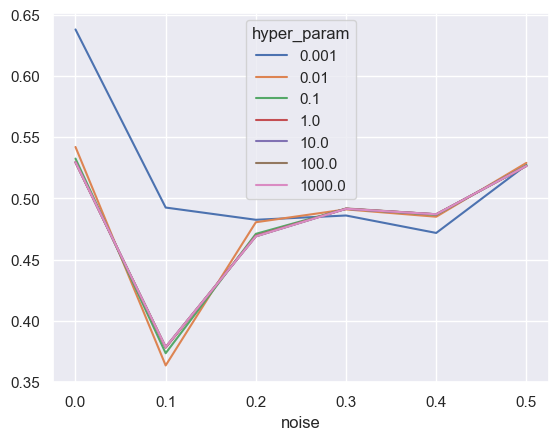

In [372]:
fig = plt.figure()
pivot.plot()

#### Answer: The most stable model and model params as written in previous answer is:
For noise = 0.0 - for all gammas the result is with accuracy 100%.
For noise = 0.1, 0.3, 0.5 gamma = in range (1.0-2.0) is best 
For noise = 0.2, 0.4 gamma 0.1 is best

As the gamma grows, the bias of the classifier grows. For gamma 100, the bias is the highest. While the vairance is best for gamma between 0.1-2 (depends on noise level).
In comparison to logistic regression, the SVM with rbf is much accurate model.

## 4.3. Does regularization help for linear models? consider different datasets sizes. 

In [373]:
results1000_log_df = results_df.query("clf == 'log_reg' and samples == 1000")
pivot_1000 = results1000_log_df.pivot_table(values = 'test_acc', index='noise', columns='hyper_param', aggfunc='mean')

<AxesSubplot:xlabel='noise'>

<Figure size 640x480 with 0 Axes>

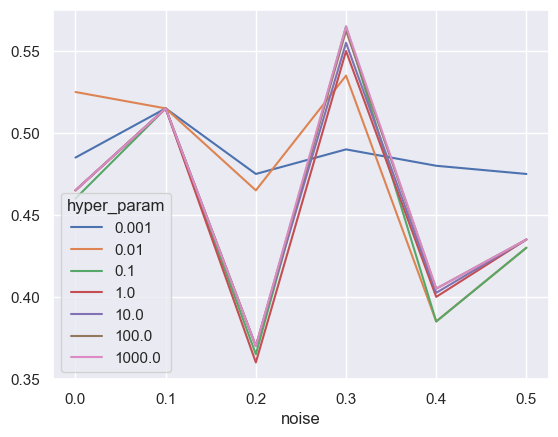

In [374]:
fig = plt.figure()
ax = pivot_1000.plot()
ax

<AxesSubplot:xlabel='noise'>

<Figure size 640x480 with 0 Axes>

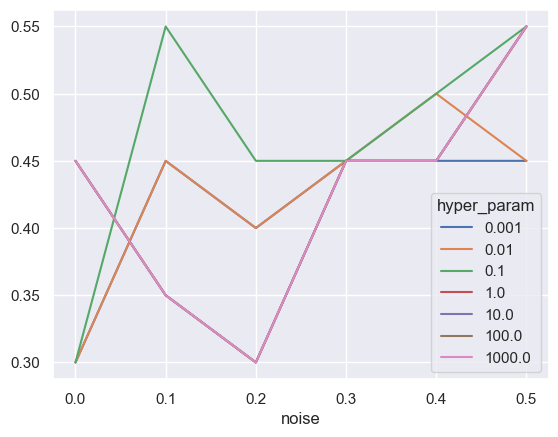

In [377]:
results100_log_df = results_df.query("clf == 'log_reg' and samples == 100")
pivot_100 = results100_log_df.pivot_table(values = 'test_acc', index='noise', columns='hyper_param', aggfunc='mean')
fig = plt.figure()
pivot_100.plot()

In [345]:
results_log_moons_df = results_df.query("clf == 'log_reg' and shape == 'moons' and samples == 100")
pivot_moons = results_log_moons_df.pivot_table(values = 'test_acc', index='noise', columns='hyper_param', aggfunc='mean')
pivot_moons

penalty,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
noise,,,,,,,
0.0,0.45,0.45,0.65,0.50,0.45,0.45,0.45
0.1,0.45,0.45,0.25,0.35,0.35,0.35,0.35
0.2,0.35,0.35,0.35,0.45,0.40,0.40,0.40
0.3,0.40,0.40,0.40,0.40,0.40,0.40,0.40
0.4,0.40,0.40,0.50,0.40,0.40,0.40,0.40
0.5,0.40,0.40,0.50,0.40,0.40,0.40,0.40


#### Answer: In Linear model the accuracy both of training and test are low.
The penalty doesn't seems to have continues trend. In bigger datasets, lower penalty had better results, In data of 100 samples, 0.1 penalty have best results.

## 4.4. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

In [405]:
noise03_svm_df = results_df.query("clf == 'svm' and noise == 0.3")
noise03_svm_df.pivot_table(values = 'train_acc', columns='samples', aggfunc='mean')

samples,5,10,50,100,1000,10000
train_acc,1.0,0.928571,0.92381,0.911905,0.843571,0.804762


In [403]:
noise03_svm_df.pivot_table(values = 'test_acc', columns='samples', aggfunc='mean')

samples,5,10,50,100,1000,10000
test_acc,0.0,0.388889,0.555556,0.627778,0.752222,0.790167


In [404]:
noise03_svm_df.pivot_table(values = 'acc_ratio', columns='samples', aggfunc='mean')

samples,5,10,50,100,1000,10000
acc_ratio,0.0,0.411111,0.611503,0.698165,0.905268,0.98255


##### 4.4.1 Answer For SVM
The accuracy ratio: test/train - as more samples there is, the accuracy ratio is higher.
The train accuracy: as more samples there is, the accuracy drops
The test accuracy: as more samples there is, the accuracy increases.

In [400]:
noise03_lr_df = results_df.query("clf == 'log_reg' and noise == 0.3")
noise03_lr_df.pivot_table(values = 'acc_ratio', columns='samples', aggfunc='mean')

samples,5,10,50,100,1000,10000
acc_ratio,0.428571,0.971429,0.744218,0.878049,0.973494,0.98571


In [402]:
noise03_lr_df.pivot_table(values = 'test_acc', columns='samples', aggfunc='mean')

samples,5,10,50,100,1000,10000
test_acc,0.214286,0.5,0.385714,0.45,0.546071,0.490679


In [401]:
noise03_lr_df.pivot_table(values = 'train_acc',  columns='samples', aggfunc='mean')

samples,5,10,50,100,1000,10000
train_acc,0.75,0.517857,0.517857,0.5125,0.561071,0.497795


##### 4.4.2 Answer For Logistic Regression
Accuracy ratio: as more samples there is, the test/train ratio is higher.
Train accuracy: there is no clear trend, but it seems that as more samples there is, the train accuracy drops (the exception is in 1000 samples)
Test accuracy: there is no clear trend, but it seems that as more samples there is, the test accuracy increases (the exception is in 1000 samples) 

## 4.5 For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)

In [416]:
noise03_svm_df2 = results_df.query("clf == 'svm' and noise == 0.3 and samples > 10" )
print(noise03_svm_df2.pivot_table(values = 'train_acc', columns='hyper_param', aggfunc='mean'))
print(noise03_svm_df2.pivot_table(values = 'test_acc', columns='hyper_param', aggfunc='mean'))
print(noise03_svm_df2.pivot_table(values = 'acc_ratio', columns='hyper_param', aggfunc='mean'))

hyper_param     0.1       1.0       5.0      10.0      50.0      100.0
train_acc    0.777357  0.800286  0.867286  0.89525  0.931679  0.954214
hyper_param     0.1      1.0     5.0       10.0      50.0   100.0
test_acc     0.722917  0.68975  0.7175  0.698333  0.649083  0.611
hyper_param     0.1      1.0       5.0       10.0      50.0      100.0
acc_ratio    0.928775  0.86644  0.841539  0.798234  0.709828  0.651413


### 4.5.1 Answer for SVM
The train accuracy improves with higher gammas
The test accuracy is best with lower gamma, it is best with gamma = 0.1 and it drops down as gamma increases (although for gamma 5.0 it is a bit higher than with 1.0). The results are slighlty different with very low number of samples. For 5-10 samples, accuracy increases till gamma = 5.0. But with this number of samples it is very occasional - so I drop the low number of samples.
The accuracy ratio is highest with gamma = 0.1 and it drops down as the gamma increases

In [417]:
noise03_log_df2 = results_df.query("clf == 'log_reg' and noise == 0.3" )
print(noise03_log_df2.pivot_table(values = 'train_acc', columns='hyper_param', aggfunc='mean'))
print(noise03_log_df2.pivot_table(values = 'test_acc', columns='hyper_param', aggfunc='mean'))
print(noise03_log_df2.pivot_table(values = 'acc_ratio', columns='hyper_param', aggfunc='mean'))

hyper_param  0.001     0.010     0.100     1.000     10.000    100.000   \
train_acc    0.505281    0.5335  0.555646  0.556896  0.560646  0.602313   

hyper_param  1000.000  
train_acc    0.602313  
hyper_param  0.001     0.010     0.100     1.000     10.000    100.000   \
test_acc        0.471  0.562667  0.384417  0.398583  0.399417  0.400708   

hyper_param  1000.000  
test_acc     0.401083  
hyper_param  0.001     0.010     0.100     1.000     10.000    100.000   \
acc_ratio    0.933918  1.069275  0.741694   0.76859  0.764368  0.766616   

hyper_param  1000.000  
acc_ratio    0.767254  


### 4.5.2 Answer for Logistic Regression
The train accuracy slighly improves as the penalty gets higher. The test accuracy is best at penalty 0.01 and gets lower as the penalty gets higher.  
The accuracy ratio is best with low penalty.

## 4.6. Are the noise level effect the number of datapoints needed to reach optimal test results? 

In [426]:
results_svm = results_df.query("clf == 'svm' and shape=='circles'")
print(results_svm.pivot_table(values = 'train_acc', index='noise', columns='samples', aggfunc='mean'))
print(results_svm.pivot_table(values = 'test_acc', index='noise', columns='samples', aggfunc='mean'))
print(results_svm.pivot_table(values = 'acc_ratio', index='noise', columns='samples', aggfunc='mean'))


samples     5         10        50        100       1000      10000
noise                                                              
0.0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
0.1      1.000000  1.000000  1.000000  0.995238  0.996905  0.994667
0.2      0.888889  0.976190  0.952381  0.980952  0.930476  0.895238
0.3      1.000000  0.928571  0.923810  0.911905  0.843571  0.804762
0.4      1.000000  1.000000  0.947619  0.923810  0.825476  0.738500
0.5      1.000000  1.000000  0.928571  0.911905  0.814524  0.704357
samples     5         10        50        100       1000      10000
noise                                                              
0.0      0.000000  0.555556  0.888889  1.000000  1.000000  1.000000
0.1      0.416667  0.444444  0.955556  0.927778  0.985000  0.993389
0.2      0.000000  0.388889  0.688889  0.905556  0.862778  0.884333
0.3      0.000000  0.388889  0.555556  0.627778  0.752222  0.790167
0.4      0.500000  0.277778  0.444444  0.605556 

### Answer: 
For SVM as the noise increases, we need more and more samples to get better results for the test accuracy, while for train accuracy, it is better to have less samples to get better accuracy. As result, the accuracy ratio increases as more samples we have